# 6.1 Classification 

## 6.1.1 Create a classification model using a logistic regression!

* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
* Train a model on 75% of the dataset! Use 25% for testing!
* Visualize the model!
* Create a confusion matrix!
* Compute precision and recall for every class in your model!

In [2]:
%matplotlib inline
import os, sys
from sklearn import linear_model, datasets
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df["target_name"]=iris['target_names'][iris_df['target']] 
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Split dataset into training and testing

In [3]:
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [4]:
len(X_test)

38

Train Model

In [8]:
%%time

h = .02  # step size in the mesh
logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X_train, y_train)

CPU times: user 6.37 ms, sys: 3.57 ms, total: 9.94 ms
Wall time: 7.6 ms


Visualize Model

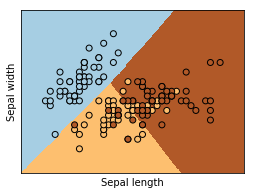

In [9]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

Confusion Matrix for Test Data

In [15]:
y_pred = logreg.predict(X_test)

In [16]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[13,  0,  0],
       [ 0,  8,  8],
       [ 0,  3,  6]])

In [17]:
accuracy_score(y_test, y_pred)

0.7105263157894737

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       0.73      0.50      0.59        16
  virginica       0.43      0.67      0.52         9

avg / total       0.75      0.71      0.72        38



Plot Confusion Matrix

Confusion matrix, without normalization


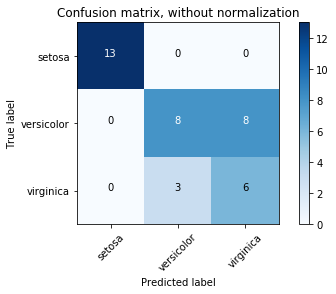

In [19]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=iris.target_names,
                      title='Confusion matrix, without normalization')

## 6.1.2 Spark

* Using Spark MLlib to create a Logistic Regression!
    * https://spark.apache.org/docs/latest/ml-features.html#feature-transformers
    * https://spark.apache.org/docs/latest/ml-features.html#featurehasher
    * https://spark.apache.org/docs/latest/ml-classification-regression.html
    * <https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.classification.LogisticRegression>
    
* Measure the training time. Compare the training time with the scikit-learn implementation! Explain! 

In [4]:
SPARK_MASTER="local[1]"
#SPARK_MASTER="spark://mpp3r03c04s06.cos.lrz.de:7077"
APP_NAME = "PySpark Lecture"
# If there is no SparkSession, create the environment
os.environ["PYSPARK_PYTHON"] = "/naslx/projects/pn69si/mnmda001/software/anaconda3/bin/python"

try:
    sc and spark
except NameError as e:
  #import findspark
  #findspark.init()
    import pyspark
    import pyspark.sql
    from pyspark.ml.feature import FeatureHasher
    from pyspark.ml.feature import VectorAssembler
    from pyspark.ml.classification import LogisticRegression
    conf=pyspark.SparkConf().set("spark.cores.max", "4")
    sc = pyspark.SparkContext(master=SPARK_MASTER, conf=conf)
    spark = pyspark.sql.SparkSession(sc).builder.appName(APP_NAME).getOrCreate()

print("PySpark initiated...")

PySpark initiated...


#### Model Training

In [5]:
%%time
iris_sdf = spark.createDataFrame(iris_df)

hasher = VectorAssembler(inputCols=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", 
                                  "petal width (cm)"],
                       outputCol="features")

featurized = hasher.transform(iris_sdf)

data_train, data_test = featurized.randomSplit([0.75, 0.25], seed=12345)

lr = LogisticRegression(featuresCol='features', labelCol='target', maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Fit the model
lrModel = lr.fit(data_train)

CPU times: user 212 ms, sys: 47.8 ms, total: 259 ms
Wall time: 29.6 s


In [6]:
data_train.show()

+-----------------+----------------+-----------------+----------------+------+-----------+-----------------+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|target|target_name|         features|
+-----------------+----------------+-----------------+----------------+------+-----------+-----------------+
|              4.3|             3.0|              1.1|             0.1|     0|     setosa|[4.3,3.0,1.1,0.1]|
|              4.4|             2.9|              1.4|             0.2|     0|     setosa|[4.4,2.9,1.4,0.2]|
|              4.4|             3.0|              1.3|             0.2|     0|     setosa|[4.4,3.0,1.3,0.2]|
|              4.4|             3.2|              1.3|             0.2|     0|     setosa|[4.4,3.2,1.3,0.2]|
|              4.6|             3.1|              1.5|             0.2|     0|     setosa|[4.6,3.1,1.5,0.2]|
|              4.6|             3.2|              1.4|             0.2|     0|     setosa|[4.6,3.2,1.4,0.2]|
|              4.7|

#### Model Summary

In [7]:
# Extract the summary from the returned LogisticRegressionModel instance trained
# in the earlier example
trainingSummary = lrModel.summary
accuracy = trainingSummary.accuracy
falsePositiveRate = trainingSummary.weightedFalsePositiveRate
truePositiveRate = trainingSummary.weightedTruePositiveRate
fMeasure = trainingSummary.weightedFMeasure()
precision = trainingSummary.weightedPrecision
recall = trainingSummary.weightedRecall
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s"
      % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))

Accuracy: 0.7130434782608696
FPR: 0.1650982727814175
TPR: 0.7130434782608696
F-measure: 0.6100334448160535
Precision: 0.5523478260869565
Recall: 0.7130434782608696


In [10]:
featurized.printSchema()

root
 |-- sepal length (cm): double (nullable = true)
 |-- sepal width (cm): double (nullable = true)
 |-- petal length (cm): double (nullable = true)
 |-- petal width (cm): double (nullable = true)
 |-- target: long (nullable = true)
 |-- target_name: string (nullable = true)
 |-- features: vector (nullable = true)



#### Model Prediction

In [8]:
predictions = lrModel.transform(data_test)
predictions.printSchema()

root
 |-- sepal length (cm): double (nullable = true)
 |-- sepal width (cm): double (nullable = true)
 |-- petal length (cm): double (nullable = true)
 |-- petal width (cm): double (nullable = true)
 |-- target: long (nullable = true)
 |-- target_name: string (nullable = true)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)

